In [1]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 9.5 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import skfuzzy as fuzz
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

In [3]:
data = pd.read_csv('online_shoppers_intention.csv')

## Necessary data preprocessing

In [4]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
encoder1 = LabelEncoder()
data['Weekend'] = encoder1.fit_transform(data['Weekend'])
data['Revenue'] = encoder1.fit_transform(data['Revenue'])

encoder2 = LabelEncoder()
data['VisitorType'] = encoder2.fit_transform(data['VisitorType'])

encoder3 = OneHotEncoder()
data['Month'] = encoder2.fit_transform(data['Month'])

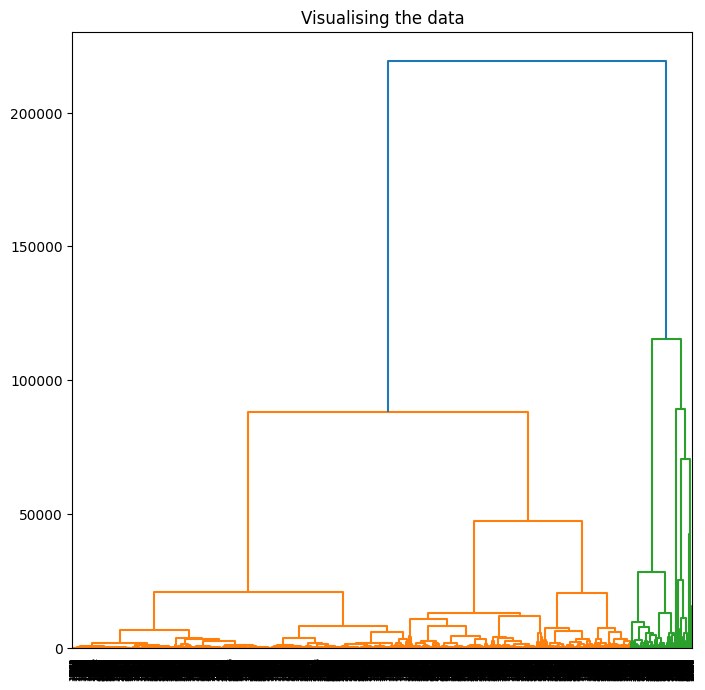

In [ ]:
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(data, method ='ward')))

# Additional data preprocessing


## No data preprocessing

In [8]:
data_transposed = data.T
models = [fuzz.cluster.cmeans(data_transposed, c = 3, m=2, error=0.005, maxiter=1000, init=None),
          fuzz.cluster.cmeans(data_transposed, c = 5, m=2, error=0.005, maxiter=1000, init=None),
          fuzz.cluster.cmeans(data_transposed, c = 7, m=2, error=0.005, maxiter=1000, init=None)]
clusters = [3, 5, 7]

In [ ]:
for i in range(len(models)):
  cntr, u, _, _, _, _, _ = models[i]
  labels = np.argmax(u, axis=0)
  print(f'Silhouette score: {silhouette_score(data, labels)} for number of clusters: {clusters[i]}')
  print(f'Davies-Bouldin score: {davies_bouldin_score(data, labels)} for number of clusters: {clusters[i]}')
  print(f'Calinski-Harabasz score: {calinski_harabasz_score(data, labels)} for number of clusters: {clusters[i]}')

Silhouette score: 0.6645899880683419 for number of clusters: 3
Davies-Bouldin score: 0.5855578766365603 for number of clusters: 3
Calinski-Harabasz score: 14635.353298385047 for number of clusters: 3
Silhouette score: 0.586174293996396 for number of clusters: 5
Davies-Bouldin score: 0.6255558150160732 for number of clusters: 5
Calinski-Harabasz score: 15287.847181976093 for number of clusters: 5
Silhouette score: 0.5332746999053865 for number of clusters: 7
Davies-Bouldin score: 0.6757748055873444 for number of clusters: 7
Calinski-Harabasz score: 14121.831101587757 for number of clusters: 7


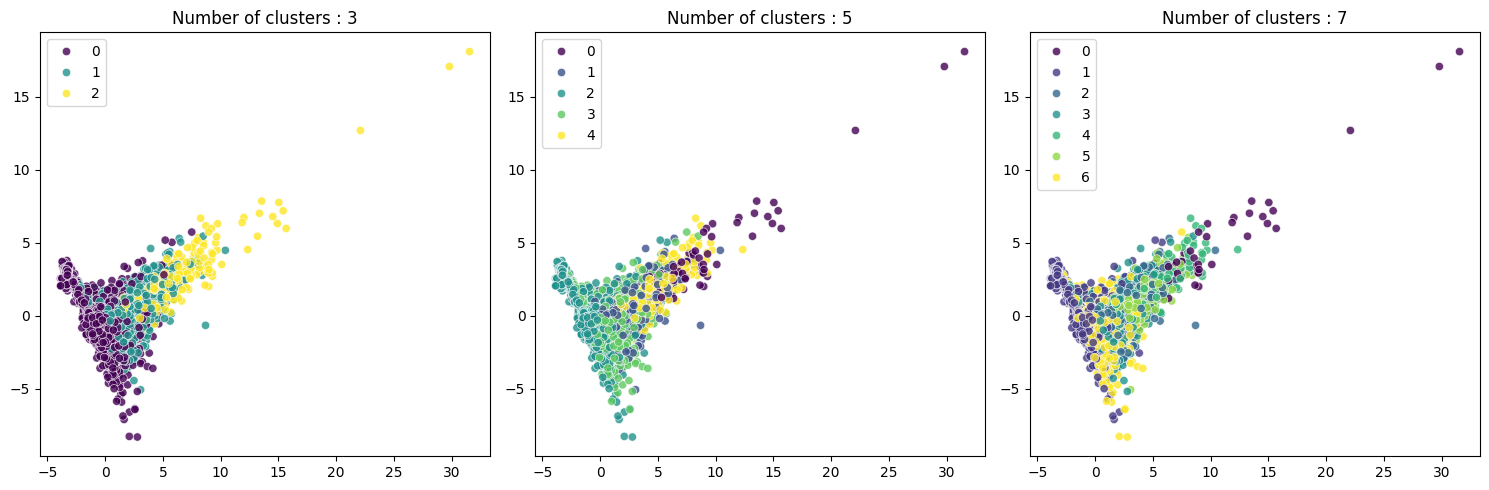

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

pca = PCA(n_components = 2)
data_pca = pca.fit_transform(data_scaled)

fig, axes = plt.subplots(1, 3, figsize = (15, 5))
for i, k in enumerate(clusters):
  cntr, u, _, _, _, _, _ = models[i]
  labels = np.argmax(u, axis = 0)
  sns.scatterplot(x = data_pca[:, 0], y = data_pca[:, 1], hue = labels, palette = "viridis", alpha = 0.8, ax = axes[i])
  axes[i].set_title(f'Number of clusters : {k}')
plt.tight_layout()
plt.show()

## Standardization & PCA

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
new_data = scaler.fit_transform(data)

pca = PCA(n_components = 2)
new_data = pca.fit_transform(new_data)

In [ ]:
data_transposed = new_data.T
models2 = [fuzz.cluster.cmeans(data_transposed, c = 3, m=2, error=0.005, maxiter=1000, init=None),
          fuzz.cluster.cmeans(data_transposed, c = 5, m=2, error=0.005, maxiter=1000, init=None),
          fuzz.cluster.cmeans(data_transposed, c = 7, m=2, error=0.005, maxiter=1000, init=None)]

In [ ]:
for i in range(len(models2)):
  cntr, u, _, _, _, _, _ = models2[i]
  labels = np.argmax(u, axis=0)
  print(f'Silhouette score: {silhouette_score(new_data, labels)} for number of clusters: {clusters[i]}')
  print(f'Davies-Bouldin score: {davies_bouldin_score(new_data, labels)} for number of clusters: {clusters[i]}')
  print(f'Calinski-Harabasz score: {calinski_harabasz_score(new_data, labels)} for number of clusters: {clusters[i]}')

Silhouette score: 0.5219343513210974 for number of clusters: 3
Davies-Bouldin score: 0.7054440411830427 for number of clusters: 3
Calinski-Harabasz score: 9065.661969903029 for number of clusters: 3
Silhouette score: 0.4583291015656376 for number of clusters: 5
Davies-Bouldin score: 0.7005897926585536 for number of clusters: 5
Calinski-Harabasz score: 10588.708448910184 for number of clusters: 5
Silhouette score: 0.3804118119813597 for number of clusters: 7
Davies-Bouldin score: 0.7547359237259467 for number of clusters: 7
Calinski-Harabasz score: 10558.649362608336 for number of clusters: 7


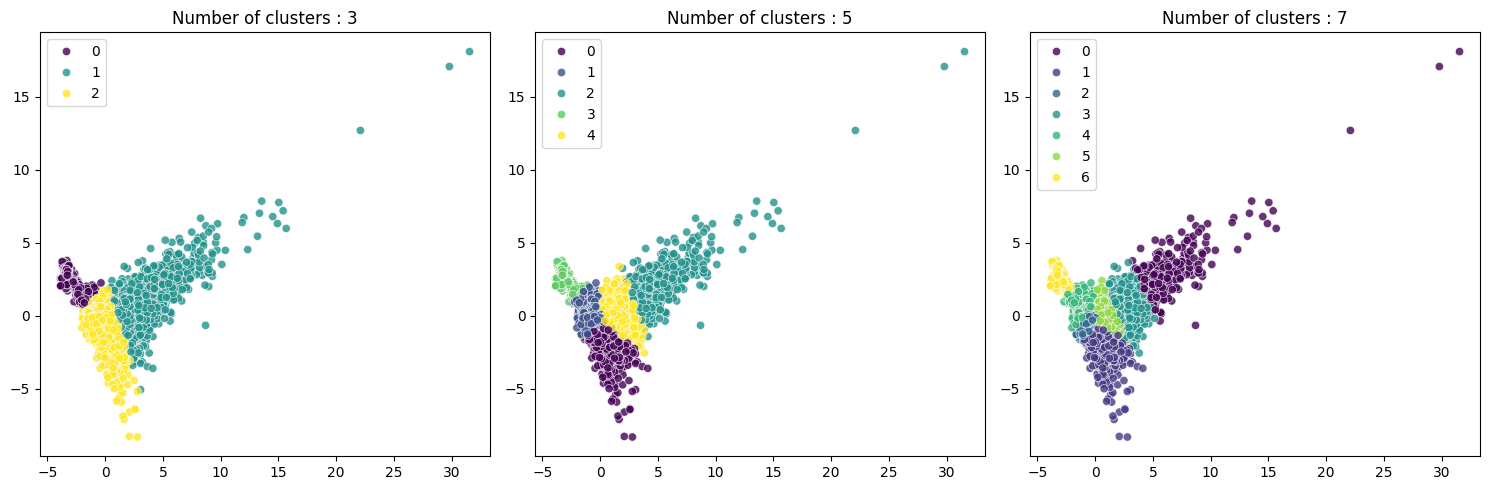

In [ ]:
fig, axes = plt.subplots(1, 3, figsize = (15, 5))
for i, k in enumerate(clusters):
  cntr, u, _, _, _, _, _ = models2[i]
  labels = np.argmax(u, axis = 0)
  sns.scatterplot(x = new_data[:, 0], y = new_data[:, 1], hue = labels, palette = "viridis", alpha = 0.8, ax = axes[i])
  axes[i].set_title(f'Number of clusters : {k}')
plt.tight_layout()
plt.show()

## Min-Max Scaling & Outlier removal

In [5]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
new_data = data[~((data < lower_bound) | (data > upper_bound)).any(axis=1)]

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
new_data = scaler.fit_transform(new_data)

In [24]:
data_transposed = new_data.T
models2 = [fuzz.cluster.cmeans(data_transposed, c = 3, m=2, error=0.005, maxiter=1000, init=None),
          fuzz.cluster.cmeans(data_transposed, c = 5, m=2, error=0.005, maxiter=1000, init=None),
          fuzz.cluster.cmeans(data_transposed, c = 7, m=2, error=0.005, maxiter=1000, init=None)]

for i in range(len(models2)):
  cntr, u, _, _, _, _, _ = models2[i]
  labels = np.argmax(u, axis=0)
  print(f'Silhouette score: {silhouette_score(new_data, labels)} for number of clusters: {clusters[i]}')
  print(f'Davies-Bouldin score: {davies_bouldin_score(new_data, labels)} for number of clusters: {clusters[i]}')
  print(f'Calinski-Harabasz score: {calinski_harabasz_score(new_data, labels)} for number of clusters: {clusters[i]}')

Silhouette score: 0.09506951255078248 for number of clusters: 3
Davies-Bouldin score: 2.10621650777756 for number of clusters: 3
Calinski-Harabasz score: 171.59034949010717 for number of clusters: 3
Silhouette score: 0.12627354934347923 for number of clusters: 5
Davies-Bouldin score: 2.748641676898644 for number of clusters: 5
Calinski-Harabasz score: 104.90734435517847 for number of clusters: 5
Silhouette score: 0.03269601092099346 for number of clusters: 7
Davies-Bouldin score: 2.0004736414381763 for number of clusters: 7
Calinski-Harabasz score: 66.0777546189432 for number of clusters: 7


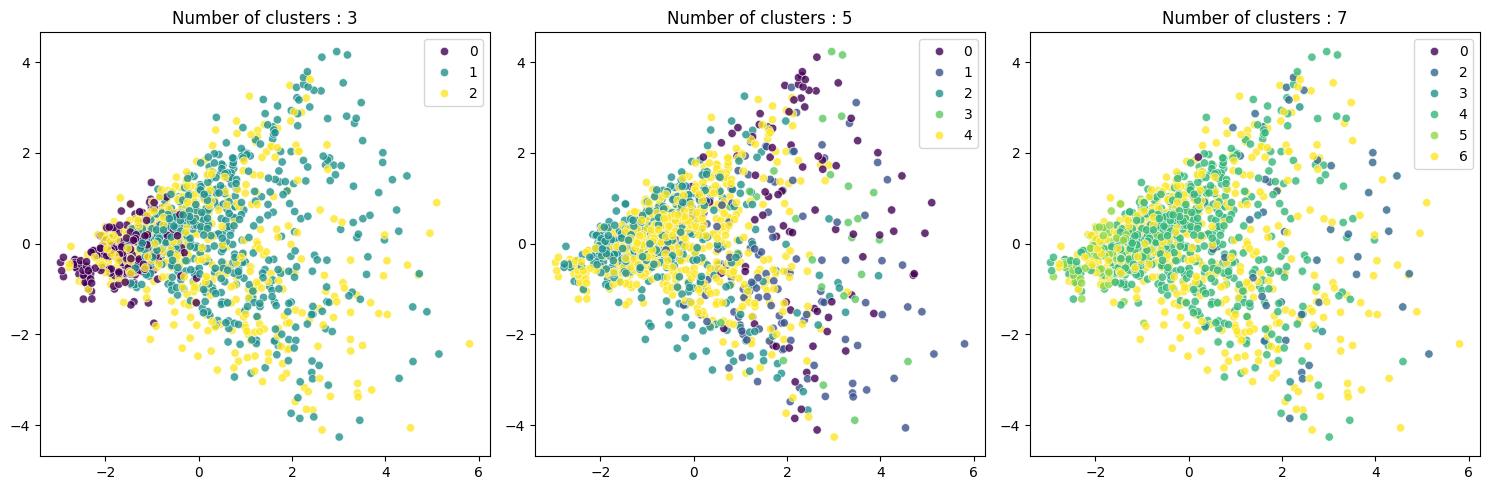

In [25]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(new_data)

pca = PCA(n_components = 2)
data_pca = pca.fit_transform(data_scaled)

fig, axes = plt.subplots(1, 3, figsize = (15, 5))
for i, k in enumerate(clusters):
  cntr, u, _, _, _, _, _ = models2[i]
  labels = np.argmax(u, axis = 0)
  sns.scatterplot(x = data_pca[:, 0], y = data_pca[:, 1], hue = labels, palette = "viridis", alpha = 0.8, ax = axes[i])
  axes[i].set_title(f'Number of clusters : {k}')
plt.tight_layout()
plt.show()

## Log transformation & normalization

In [ ]:
new_data = np.log1p(data + 1)

In [ ]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer(norm='l2')
new_data = normalizer.fit_transform(new_data)

In [ ]:
data_transposed = new_data.T
models2 = [fuzz.cluster.cmeans(data_transposed, c = 3, m=2, error=0.005, maxiter=1000, init=None),
          fuzz.cluster.cmeans(data_transposed, c = 5, m=2, error=0.005, maxiter=1000, init=None),
          fuzz.cluster.cmeans(data_transposed, c = 7, m=2, error=0.005, maxiter=1000, init=None)]

for i in range(len(models2)):
  cntr, u, _, _, _, _, _ = models2[i]
  labels = np.argmax(u, axis=0)
  print(f'Silhouette score: {silhouette_score(new_data, labels)} for number of clusters: {clusters[i]}')
  print(f'Davies-Bouldin score: {davies_bouldin_score(new_data, labels)} for number of clusters: {clusters[i]}')
  print(f'Calinski-Harabasz score: {calinski_harabasz_score(new_data, labels)} for number of clusters: {clusters[i]}')

Silhouette score: 0.3184930063910023 for number of clusters: 3
Davies-Bouldin score: 1.5426364630618707 for number of clusters: 3
Calinski-Harabasz score: 3925.009100365003 for number of clusters: 3
Silhouette score: 0.2923081378492487 for number of clusters: 5
Davies-Bouldin score: 1.315229394016485 for number of clusters: 5
Calinski-Harabasz score: 6122.11430447505 for number of clusters: 5
Silhouette score: 0.19492865309002153 for number of clusters: 7
Davies-Bouldin score: 1.643093481383957 for number of clusters: 7
Calinski-Harabasz score: 4803.467091995741 for number of clusters: 7


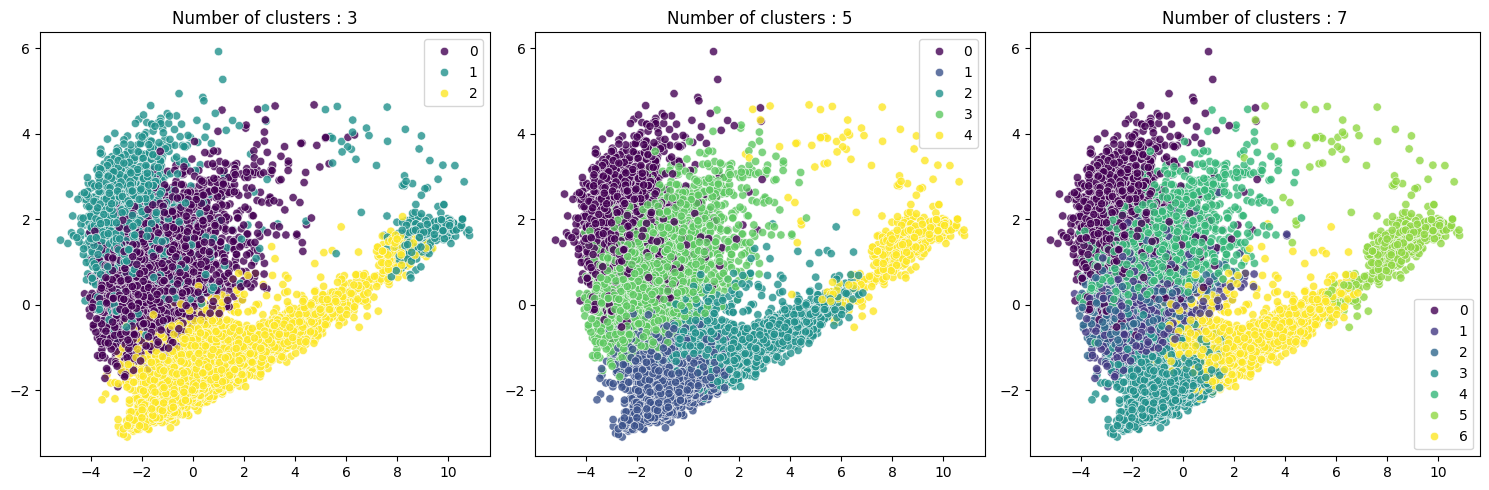

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(new_data)

pca = PCA(n_components = 2)
data_pca = pca.fit_transform(data_scaled)

fig, axes = plt.subplots(1, 3, figsize = (15, 5))
for i, k in enumerate(clusters):
  cntr, u, _, _, _, _, _ = models2[i]
  labels = np.argmax(u, axis = 0)
  sns.scatterplot(x = data_pca[:, 0], y = data_pca[:, 1], hue = labels, palette = "viridis", alpha = 0.8, ax = axes[i])
  axes[i].set_title(f'Number of clusters : {k}')
plt.tight_layout()
plt.show()

## Feature selection & discretization

In [ ]:
from sklearn.feature_selection import VarianceThreshold
var_thresh = VarianceThreshold(threshold = 0.01)
new_data = var_thresh.fit_transform(data)

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
new_data = discretizer.fit_transform(new_data)

In [ ]:
data_transposed = new_data.T
models2 = [fuzz.cluster.cmeans(data_transposed, c = 3, m=2, error=0.005, maxiter=1000, init=None),
          fuzz.cluster.cmeans(data_transposed, c = 5, m=2, error=0.005, maxiter=1000, init=None),
          fuzz.cluster.cmeans(data_transposed, c = 7, m=2, error=0.005, maxiter=1000, init=None)]

for i in range(len(models2)):
  cntr, u, _, _, _, _, _ = models2[i]
  labels = np.argmax(u, axis=0)
  print(f'Silhouette score: {silhouette_score(new_data, labels)} for number of clusters: {clusters[i]}')
  print(f'Davies-Bouldin score: {davies_bouldin_score(new_data, labels)} for number of clusters: {clusters[i]}')
  print(f'Calinski-Harabasz score: {calinski_harabasz_score(new_data, labels)} for number of clusters: {clusters[i]}')

Silhouette score: 0.17589552656144197 for number of clusters: 3
Davies-Bouldin score: 2.3359995701569987 for number of clusters: 3
Calinski-Harabasz score: 1326.7639582284307 for number of clusters: 3
Silhouette score: 0.1738697083965744 for number of clusters: 5
Davies-Bouldin score: 1.7974252866007023 for number of clusters: 5
Calinski-Harabasz score: 1082.0855176083319 for number of clusters: 5
Silhouette score: 0.15237695511306615 for number of clusters: 7
Davies-Bouldin score: 1.4945739927359714 for number of clusters: 7
Calinski-Harabasz score: 851.6932402431198 for number of clusters: 7


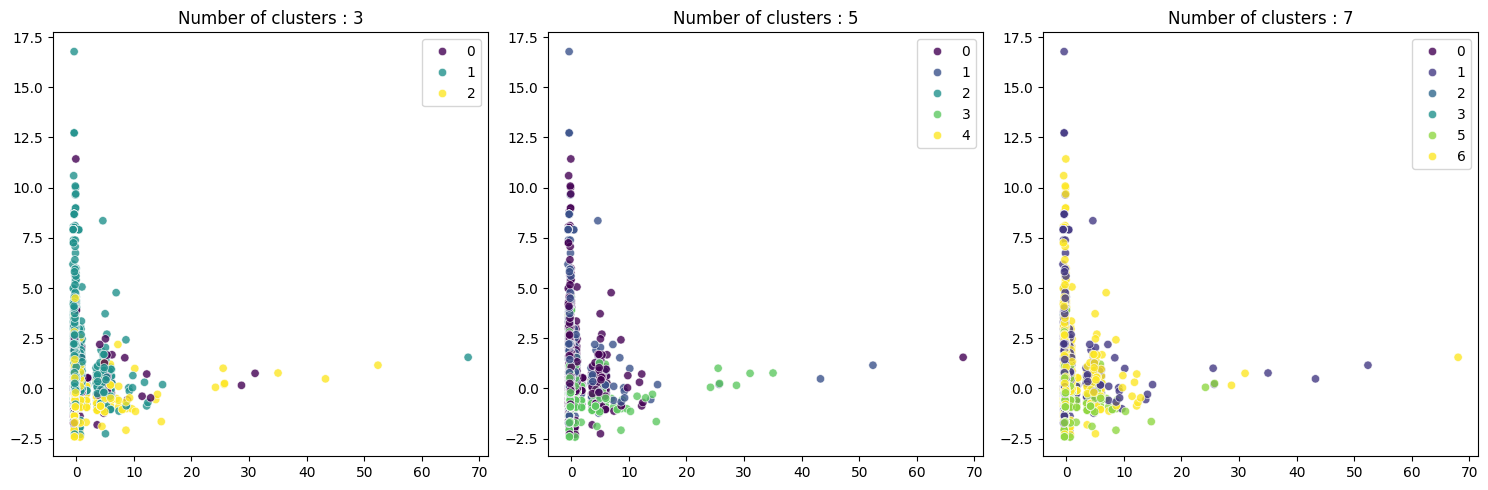

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(new_data)

pca = PCA(n_components = 2)
data_pca = pca.fit_transform(data_scaled)

fig, axes = plt.subplots(1, 3, figsize = (15, 5))
for i, k in enumerate(clusters):
  cntr, u, _, _, _, _, _ = models2[i]
  labels = np.argmax(u, axis = 0)
  sns.scatterplot(x = data_pca[:, 0], y = data_pca[:, 1], hue = labels, palette = "viridis", alpha = 0.8, ax = axes[i])
  axes[i].set_title(f'Number of clusters : {k}')
plt.tight_layout()
plt.show()

## Robust Scaling & Feature Engineering

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
new_data = scaler.fit_transform(data)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)
new_data = poly.fit_transform(new_data)

In [ ]:
data_transposed = new_data.T
models2 = [fuzz.cluster.cmeans(data_transposed, c = 3, m=2, error=0.005, maxiter=1000, init=None),
          fuzz.cluster.cmeans(data_transposed, c = 5, m=2, error=0.005, maxiter=1000, init=None),
          fuzz.cluster.cmeans(data_transposed, c = 7, m=2, error=0.005, maxiter=1000, init=None)]

for i in range(len(models2)):
  cntr, u, _, _, _, _, _ = models2[i]
  labels = np.argmax(u, axis=0)
  print(f'Silhouette score: {silhouette_score(new_data, labels)} for number of clusters: {clusters[i]}')
  print(f'Davies-Bouldin score: {davies_bouldin_score(new_data, labels)} for number of clusters: {clusters[i]}')
  print(f'Calinski-Harabasz score: {calinski_harabasz_score(new_data, labels)} for number of clusters: {clusters[i]}')

Silhouette score: 0.9784640336890271 for number of clusters: 3
Davies-Bouldin score: 0.47173002291356325 for number of clusters: 3
Calinski-Harabasz score: 34394.23241656283 for number of clusters: 3
Silhouette score: 0.9629132749528034 for number of clusters: 5
Davies-Bouldin score: 0.4570623300453983 for number of clusters: 5
Calinski-Harabasz score: 56277.11356767599 for number of clusters: 5
Silhouette score: 0.9562217624969956 for number of clusters: 7
Davies-Bouldin score: 0.45630821024052304 for number of clusters: 7
Calinski-Harabasz score: 77802.96289562387 for number of clusters: 7


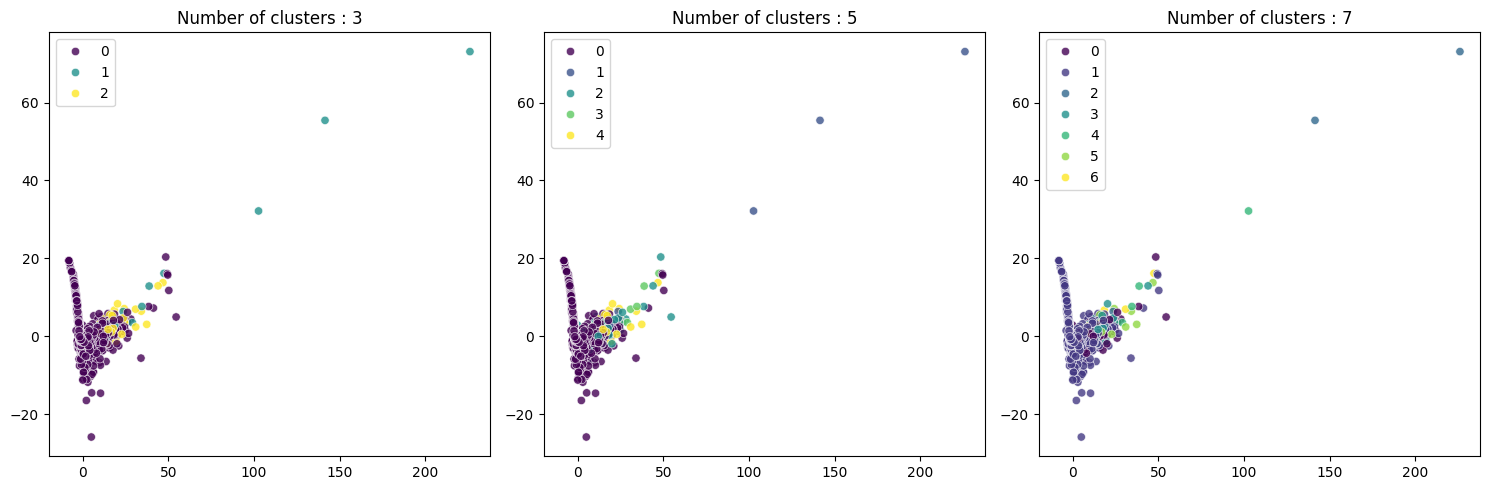

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(new_data)

pca = PCA(n_components = 2)
data_pca = pca.fit_transform(data_scaled)

fig, axes = plt.subplots(1, 3, figsize = (15, 5))
for i, k in enumerate(clusters):
  cntr, u, _, _, _, _, _ = models2[i]
  labels = np.argmax(u, axis = 0)
  sns.scatterplot(x = data_pca[:, 0], y = data_pca[:, 1], hue = labels, palette = "viridis", alpha = 0.8, ax = axes[i])
  axes[i].set_title(f'Number of clusters : {k}')
plt.tight_layout()
plt.show()